### PUDL project

##### Importing the required librarys

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import impute
import seaborn as sns


In [2]:
PDU =pd.read_csv(r"I:\MACHINE LEARNIG\ASSIGNEMENTS\AS1\fuel_receipts_costs_eia923.csv")

C:\Users\Hello\AppData\Local\Temp\ipykernel_20956\3351352073.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  PDU =pd.read_csv(r"I:\MACHINE LEARNIG\ASSIGNEMENTS\AS1\fuel_receipts_costs_eia923.csv")


### Looking for NA values


In [3]:
PDU.isnull().sum()

rowid                                            0
plant_id_eia                                     0
plant_id_eia_label                           11165
report_date                                      0
contract_type_code                             238
contract_type_code_label                       238
contract_expiration_date                    344302
energy_source_code                               1
energy_source_code_label                         1
fuel_type_code_pudl                              1
fuel_group_code                                  1
mine_id_pudl                                391947
mine_id_pudl_label                          391947
supplier_name                                    3
fuel_received_units                              0
fuel_mmbtu_per_unit                              0
sulfur_content_pct                               0
ash_content_pct                                  0
mercury_content_ppm                         289482
fuel_cost_per_mmbtu            

### Dropping the variables that have categorical and non-significant

In [4]:
PDU1=PDU.copy()
PDU1.drop(['rowid','plant_id_eia','plant_id_eia_label','report_date','contract_type_code_label',
         'contract_expiration_date','energy_source_code','energy_source_code_label','fuel_type_code_pudl',
           'primary_transportation_mode_code','primary_transportation_mode_code_label','supplier_name',
           'secondary_transportation_mode_code','secondary_transportation_mode_code_label','natural_gas_transport_code',
           'natural_gas_delivery_contract_type_code','report_date','data_maturity','data_maturity_label'  ] ,axis=1,inplace= True)

In [5]:

PDU1.isnull().sum()

contract_type_code         238
fuel_group_code              1
mine_id_pudl            391947
mine_id_pudl_label      391947
fuel_received_units          0
fuel_mmbtu_per_unit          0
sulfur_content_pct           0
ash_content_pct              0
mercury_content_ppm     289482
fuel_cost_per_mmbtu     200240
moisture_content_pct    516589
chlorine_content_ppm    516589
dtype: int64

### Droping the missing values in our new data set contains 65066 rows and using the 12 required columns


In [6]:
PDU1=PDU1.dropna()
PDU1

,contract_type_code,fuel_group_code,mine_id_pudl,mine_id_pudl_label,fuel_received_units,fuel_mmbtu_per_unit,sulfur_content_pct,ash_content_pct,mercury_content_ppm,fuel_cost_per_mmbtu,moisture_content_pct,chlorine_content_ppm
315779,C,coal,1038.0,1038.0,167498.0,21.284,0.55,7.60,0.000,3.978,0.00,0.0
315780,C,coal,1038.0,1038.0,37259.0,22.634,0.36,7.70,0.000,1.849,0.00,0.0
315783,C,coal,3106.0,3106.0,8157.0,25.177,1.81,13.20,0.000,3.678,3.91,0.0
315786,C,coal,1038.0,1038.0,43585.0,21.284,0.55,7.60,0.000,4.345,0.00,0.0
315787,C,coal,4019.0,4019.0,77250.0,23.948,1.33,12.60,0.000,3.997,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
608335,S,coal,20.0,20.0,78353.0,18.090,0.22,4.57,0.000,2.290,26.56,0.0
608343,C,coal,660.0,660.0,47191.0,16.160,0.35,5.30,0.093,0.814,31.65,0.0
608344,C,coal,605.0,605.0,200719.0,16.100,0.28,4.70,0.000,0.891,32.29,0.0
608372,C,coal,633.0,633.0,24744.0,12.400,0.63,11.30,0.108,2.695,37.25,0.0


###  Adding Lable to categorical value to convert categorical to numerical value

In [7]:
 
PDU1['contract_type_code'] = PDU1['contract_type_code'].map({'C': 1,'NC': 2,'S': 3, 'T': 4})
PDU1['fuel_group_code'] = PDU1['fuel_group_code'].map({'coal': 1,'natural_gas': 2,'other_gas': 3, 'petroleum': 4,'petroleum_coke':5})

### choosing random 2 % of data from new data set has 13013 rows

In [8]:
PDU_set1 = PDU1.sample(13013)
PDU_set1

,contract_type_code,fuel_group_code,mine_id_pudl,mine_id_pudl_label,fuel_received_units,fuel_mmbtu_per_unit,sulfur_content_pct,ash_content_pct,mercury_content_ppm,fuel_cost_per_mmbtu,moisture_content_pct,chlorine_content_ppm
563650,1,1,4013.0,4013.0,22404.0,24.092,0.69,11.56,0.000,2.737,7.37,0.0
399963,3,1,19.0,19.0,32858.0,17.530,0.20,4.30,0.000,1.588,27.90,0.0
388531,1,1,637.0,637.0,16386.0,21.430,4.49,19.30,0.000,1.797,6.66,0.0
335494,3,1,3886.0,3886.0,13131.0,25.988,3.23,7.80,0.000,3.195,6.97,0.0
422144,3,1,3063.0,3063.0,36319.0,22.860,3.04,8.30,0.000,1.677,13.75,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
475250,1,1,3867.0,3867.0,3565.0,23.230,2.71,8.20,0.000,1.753,12.05,0.0
593175,3,1,4344.0,4344.0,432.0,23.150,3.15,8.20,0.067,2.940,12.86,1075.0
348699,1,1,20.0,20.0,28703.0,17.330,0.44,6.60,0.000,2.216,27.52,0.0
342610,1,1,19.0,19.0,90621.0,17.110,0.24,4.50,0.000,2.075,28.00,0.0


###  spliting the data into test and train

In [9]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(PDU_set1, test_size=0.25,random_state=12)
Dtrain= train.copy()

### Normalsing the train data

In [10]:
dfnormalize= preprocessing.normalize(train)
print(type(train))
print(train.columns)
PDU2=pd.DataFrame(dfnormalize, columns=train.columns)
PDU2

<class 'pandas.core.frame.DataFrame'>
Index(['contract_type_code', 'fuel_group_code', 'mine_id_pudl',
       'mine_id_pudl_label', 'fuel_received_units', 'fuel_mmbtu_per_unit',
       'sulfur_content_pct', 'ash_content_pct', 'mercury_content_ppm',
       'fuel_cost_per_mmbtu', 'moisture_content_pct', 'chlorine_content_ppm'],
      dtype='object')


,contract_type_code,fuel_group_code,mine_id_pudl,mine_id_pudl_label,fuel_received_units,fuel_mmbtu_per_unit,sulfur_content_pct,ash_content_pct,mercury_content_ppm,fuel_cost_per_mmbtu,moisture_content_pct,chlorine_content_ppm
0,0.000662,0.000221,0.004636,0.004636,0.999950,0.003885,0.000044,0.000993,0.000012,0.000381,0.006070,0.001987
1,0.000243,0.000081,0.171187,0.171187,0.970250,0.002166,0.000136,0.000673,0.000000,0.000274,0.000000,0.000000
2,0.000019,0.000019,0.000359,0.000359,1.000000,0.000332,0.000004,0.000079,0.000000,0.000027,0.000524,0.000000
3,0.000039,0.000039,0.172374,0.172374,0.969832,0.000943,0.000036,0.000485,0.000000,0.000142,0.000486,0.000000
4,0.000048,0.000048,0.100925,0.100925,0.986720,0.001204,0.000153,0.000397,0.000000,0.000161,0.000383,0.077523
...,...,...,...,...,...,...,...,...,...,...,...,...
9754,0.000019,0.000019,0.074176,0.074176,0.994483,0.000472,0.000083,0.000181,0.000000,0.000036,0.000000,0.000000
9755,0.000018,0.000018,0.018490,0.018490,0.999658,0.000426,0.000011,0.000172,0.000000,0.000034,0.000133,0.000000
9756,0.000057,0.000057,0.001133,0.001133,0.999997,0.001012,0.000016,0.000306,0.000000,0.000099,0.001496,0.000000
9757,0.000015,0.000015,0.057867,0.057867,0.996606,0.000370,0.000064,0.000140,0.000002,0.000026,0.000110,0.008939


### Ploting the graph from train data to understand structure

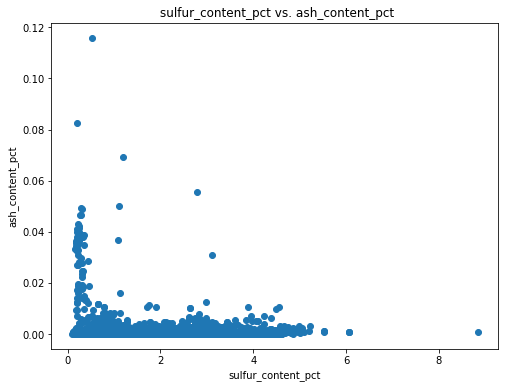

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(train.sulfur_content_pct,PDU2.ash_content_pct)
plt.xlabel('sulfur_content_pct')
plt.ylabel('ash_content_pct')
plt.title(' sulfur_content_pct vs. ash_content_pct')
plt.show()

### Applying Elbow method to view appropriate clusters

In [12]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k,init='k-means++', max_iter=1000)
    
    kmeans.fit(PDU2)
    
    sse[k] = kmeans.inertia_ 


In [13]:
sse

{1: 830.466157948513,
 2: 225.75089691018897,
 3: 94.85094583077156,
 4: 56.8684348405632,
 5: 37.26140034585412,
 6: 28.47036090588756,
 7: 21.78241564178968,
 8: 18.5220796935864,
 9: 16.28923057371758}

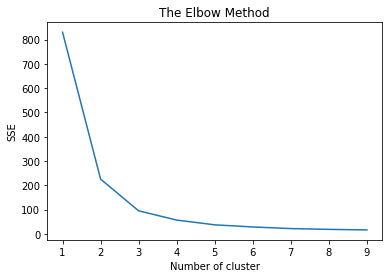

In [14]:
plt.plot(list(sse.keys()), list(sse.values()))
plt.title('The Elbow Method')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

###  After identifying the SSE value, choosen k=3 is good to from clusters to the data

In [15]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=1000,n_init = 10, random_state = 0) 

cluster_ids=kmeans.fit_predict(PDU2)
centers=kmeans.cluster_centers_
print(centers)

[[6.99377410e-05 4.71717030e-05 1.89580254e-02 1.89580254e-02
  9.98421742e-01 9.35447346e-04 5.04947884e-05 3.44532129e-04
  8.48874637e-07 1.03150999e-04 8.69464444e-04 1.19778357e-03]
 [5.03946914e-04 2.49192773e-04 6.30215264e-01 6.30215264e-01
  3.78891790e-01 5.48706023e-03 3.95263786e-04 2.49776546e-03
  3.19382065e-06 5.79680432e-04 3.03971770e-03 1.53299533e-02]
 [4.91905016e-04 2.89577726e-04 2.64280129e-01 2.64280129e-01
  9.13881431e-01 5.74178406e-03 2.40521607e-04 1.97226227e-03
  2.20402974e-06 6.45434842e-04 5.22874815e-03 6.62605937e-03]]


In [16]:

train["cluster"]=kmeans.fit_predict(PDU2)
train


,contract_type_code,fuel_group_code,mine_id_pudl,mine_id_pudl_label,fuel_received_units,fuel_mmbtu_per_unit,sulfur_content_pct,ash_content_pct,mercury_content_ppm,fuel_cost_per_mmbtu,moisture_content_pct,chlorine_content_ppm,cluster
577976,3,1,21.0,21.0,4530.0,17.600,0.20,4.50,0.054,1.726,27.50,9.0,0
326646,3,1,2110.0,2110.0,11959.0,26.698,1.68,8.30,0.000,3.379,0.00,0.0,2
551101,1,1,19.0,19.0,52987.0,17.590,0.21,4.20,0.000,1.434,27.77,0.0,0
565665,1,1,4405.0,4405.0,24784.0,24.100,0.93,12.40,0.000,3.633,12.41,0.0,2
394889,1,1,2083.0,2083.0,20365.0,24.850,3.16,8.20,0.000,3.316,7.91,1600.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
348871,1,1,3884.0,3884.0,52073.0,24.710,4.33,9.49,0.000,1.884,0.00,0.0,0
522281,1,1,1056.0,1056.0,57093.0,24.344,0.61,9.80,0.000,1.914,7.58,0.0,0
344386,1,1,20.0,20.0,17646.0,17.854,0.29,5.40,0.000,1.750,26.40,0.0,0
511343,1,1,3884.0,3884.0,66892.0,24.810,4.31,9.40,0.118,1.716,7.40,600.0,0


### Applying Silhouette method

In [17]:
import sklearn.metrics as metrics
import sklearn.cluster as cluster
SK = range(2,13)
sil_score = []
for i in SK:
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=42).fit(PDU2).labels_
    score = metrics.silhouette_score(PDU2,labels,metric="euclidean",sample_size=250,random_state=42)
    sil_score.append(score)
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(PDU2,labels,metric="euclidean",sample_size=250,random_state=42)))

Silhouette score for k(clusters) = 2 is 0.8477045276905745
Silhouette score for k(clusters) = 3 is 0.7846044136184567
Silhouette score for k(clusters) = 4 is 0.7696542370187592
Silhouette score for k(clusters) = 5 is 0.7907949833309897
Silhouette score for k(clusters) = 6 is 0.7948067409540835
Silhouette score for k(clusters) = 7 is 0.7697811381179613
Silhouette score for k(clusters) = 8 is 0.7770146797015636
Silhouette score for k(clusters) = 9 is 0.7660925321466551
Silhouette score for k(clusters) = 10 is 0.7660925321466551
Silhouette score for k(clusters) = 11 is 0.7484185535259232
Silhouette score for k(clusters) = 12 is 0.7484185535259232


In [18]:

sil_centers = pd.DataFrame({'Clusters' : SK, 'Sil Score' : sil_score})
sil_centers

,Clusters,Sil Score
0,2,0.847705
1,3,0.784604
2,4,0.769654
3,5,0.790795
4,6,0.794807
5,7,0.769781
6,8,0.777015
7,9,0.766093
8,10,0.766093
9,11,0.748419


<AxesSubplot:xlabel='Clusters', ylabel='Sil Score'>

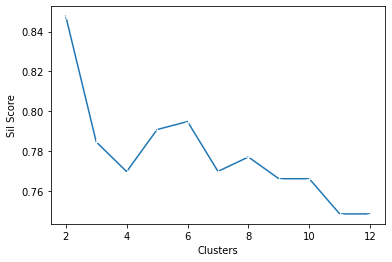

In [19]:
sns.lineplot(x = 'Clusters', y = 'Sil Score', data = sil_centers, marker="+")




###  Plotting the clusters according the  clusters=3 

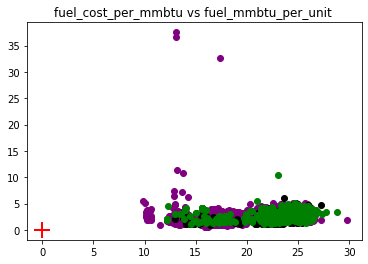

In [20]:
plt.scatter(Dtrain.fuel_mmbtu_per_unit[cluster_ids==0],Dtrain.fuel_cost_per_mmbtu[cluster_ids==0],c='purple',label='cluster0')
plt.scatter(Dtrain.fuel_mmbtu_per_unit[cluster_ids==1],Dtrain.fuel_cost_per_mmbtu[cluster_ids==1],c='black',label='cluster1')
plt.scatter(Dtrain.fuel_mmbtu_per_unit[cluster_ids==2],Dtrain.fuel_cost_per_mmbtu[cluster_ids==2],c='green',label='cluster2')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='+',c='red',s=250,label='centroids')
plt.title('fuel_cost_per_mmbtu vs fuel_mmbtu_per_unit ')
plt.show()

### Analysing the data acoording to the 3 cluster Ids

In [374]:
train[cluster_ids==0].describe()

,contract_type_code,fuel_group_code,mine_id_pudl,mine_id_pudl_label,fuel_received_units,fuel_mmbtu_per_unit,sulfur_content_pct,ash_content_pct,mercury_content_ppm,fuel_cost_per_mmbtu,moisture_content_pct,chlorine_content_ppm,cluster
count,7468.000000,7468.0,7468.000000,7468.000000,7468.000000,7468.000000,7468.000000,7468.000000,7468.000000,7468.000000,7468.000000,7468.000000,7468.0
mean,1.346144,1.0,723.003749,723.003749,68293.242367,19.864971,1.086181,7.091762,0.015878,2.145031,19.349958,31.073514,0.0
std,0.751252,0.0,1247.756696,1247.756696,80906.604653,3.304090,1.201722,3.280234,0.035510,0.783350,10.291230,199.338118,0.0
min,1.000000,1.0,4.000000,4.000000,224.000000,10.150000,0.140000,3.300000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.000000,1.0,20.000000,20.000000,22330.000000,17.490000,0.240000,4.800000,0.000000,1.731000,10.000000,0.000000,0.0
50%,1.000000,1.0,42.000000,42.000000,42666.000000,17.959000,0.350000,5.700000,0.000000,2.057000,25.930000,0.000000,0.0
75%,1.000000,1.0,660.000000,660.000000,81410.000000,23.074250,2.280000,8.600000,0.000000,2.432000,27.600000,0.000000,0.0
max,3.000000,1.0,4522.000000,4522.000000,935695.000000,28.394000,6.070000,45.000000,0.300000,41.656000,56.550000,3500.000000,0.0


In [375]:
train[cluster_ids==1].describe()


,contract_type_code,fuel_group_code,mine_id_pudl,mine_id_pudl_label,fuel_received_units,fuel_mmbtu_per_unit,sulfur_content_pct,ash_content_pct,mercury_content_ppm,fuel_cost_per_mmbtu,moisture_content_pct,chlorine_content_ppm,cluster
count,1645.000000,1645.0,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.000000,1645.0
mean,1.672340,1.0,3114.051064,3114.051064,12163.501520,23.602870,1.773739,10.365264,0.009433,2.645880,8.628954,76.395137,1.0
std,0.938625,0.0,1098.863029,1098.863029,5785.441793,2.255172,1.089564,3.527976,0.029977,0.708191,5.800459,317.440376,0.0
min,1.000000,1.0,18.000000,18.000000,51.000000,12.200000,0.120000,3.000000,0.000000,1.153000,0.000000,0.000000,1.0
25%,1.000000,1.0,2298.000000,2298.000000,8802.000000,23.000000,0.850000,8.200000,0.000000,2.082000,5.990000,0.000000,1.0
50%,1.000000,1.0,3027.000000,3027.000000,11926.000000,23.986000,1.260000,9.500000,0.000000,2.565000,7.300000,0.000000,1.0
75%,3.000000,1.0,4022.000000,4022.000000,13423.000000,24.850000,2.830000,12.000000,0.000000,3.145000,11.200000,0.000000,1.0
max,3.000000,1.0,4536.000000,4536.000000,30569.000000,28.000000,5.310000,38.700000,0.286000,10.522000,38.770000,2900.000000,1.0


In [376]:
train[cluster_ids==2].describe()


,contract_type_code,fuel_group_code,mine_id_pudl,mine_id_pudl_label,fuel_received_units,fuel_mmbtu_per_unit,sulfur_content_pct,ash_content_pct,mercury_content_ppm,fuel_cost_per_mmbtu,moisture_content_pct,chlorine_content_ppm,cluster
count,646.000000,646.0,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.0
mean,1.987616,1.0,3317.407121,3317.407121,2320.421053,23.052515,1.748034,10.829861,0.012209,2.456452,9.246424,97.040248,2.0
std,0.983508,0.0,1065.293417,1065.293417,1821.050960,2.614086,1.082490,4.511429,0.035896,0.704246,6.808808,324.979587,0.0
min,1.000000,1.0,37.000000,37.000000,4.000000,10.300000,0.120000,3.900000,0.000000,0.525000,0.000000,0.000000,2.0
25%,1.000000,1.0,2358.000000,2358.000000,725.500000,22.833250,0.842500,8.200000,0.000000,1.920000,6.217500,0.000000,2.0
50%,2.000000,1.0,3884.000000,3884.000000,1808.500000,23.742000,1.245000,9.800000,0.000000,2.475000,8.225000,0.000000,2.0
75%,3.000000,1.0,4171.000000,4171.000000,3463.750000,24.287000,2.720000,12.047500,0.000000,2.914750,11.777500,0.000000,2.0
max,3.000000,1.0,4559.000000,4559.000000,6683.000000,27.350000,5.180000,53.700000,0.317000,5.977000,36.100000,2900.000000,2.0


### Fuel receving units cluster 0 has high meand and std then other two clusters means the power plants in this cluster will purchasing highest fuel quantity
### Fuel cost effectingt the most so cluster 0 has low fuel cost than other cluster
### Sulphur content is low in cluster 2 when it compared with other cluster 1 and 0
### Moisture content is more in cluster 0 it has highest mean vlaue
### Ash content is low means value of 7 when it compared with has cluster 1 and 2 
### chlorine content is more in cluster 2 vey low in cluster 0

###  Graphical representation of clusters with respect to their varibles

In [386]:
columns=['contract_type_code','fuel_group_code','mine_id_pudl','fuel_received_units','fuel_mmbtu_per_unit','sulfur_content_pct','ash_content_pct','mercury_content_ppm','fuel_cost_per_mmbtu','moisture_content_pct','chlorine_content_ppm']
list(enumerate(columns))

[(0, 'contract_type_code'),
 (1, 'fuel_group_code'),
 (2, 'mine_id_pudl'),
 (3, 'fuel_received_units'),
 (4, 'fuel_mmbtu_per_unit'),
 (5, 'sulfur_content_pct'),
 (6, 'ash_content_pct'),
 (7, 'mercury_content_ppm'),
 (8, 'fuel_cost_per_mmbtu'),
 (9, 'moisture_content_pct'),
 (10, 'chlorine_content_ppm')]

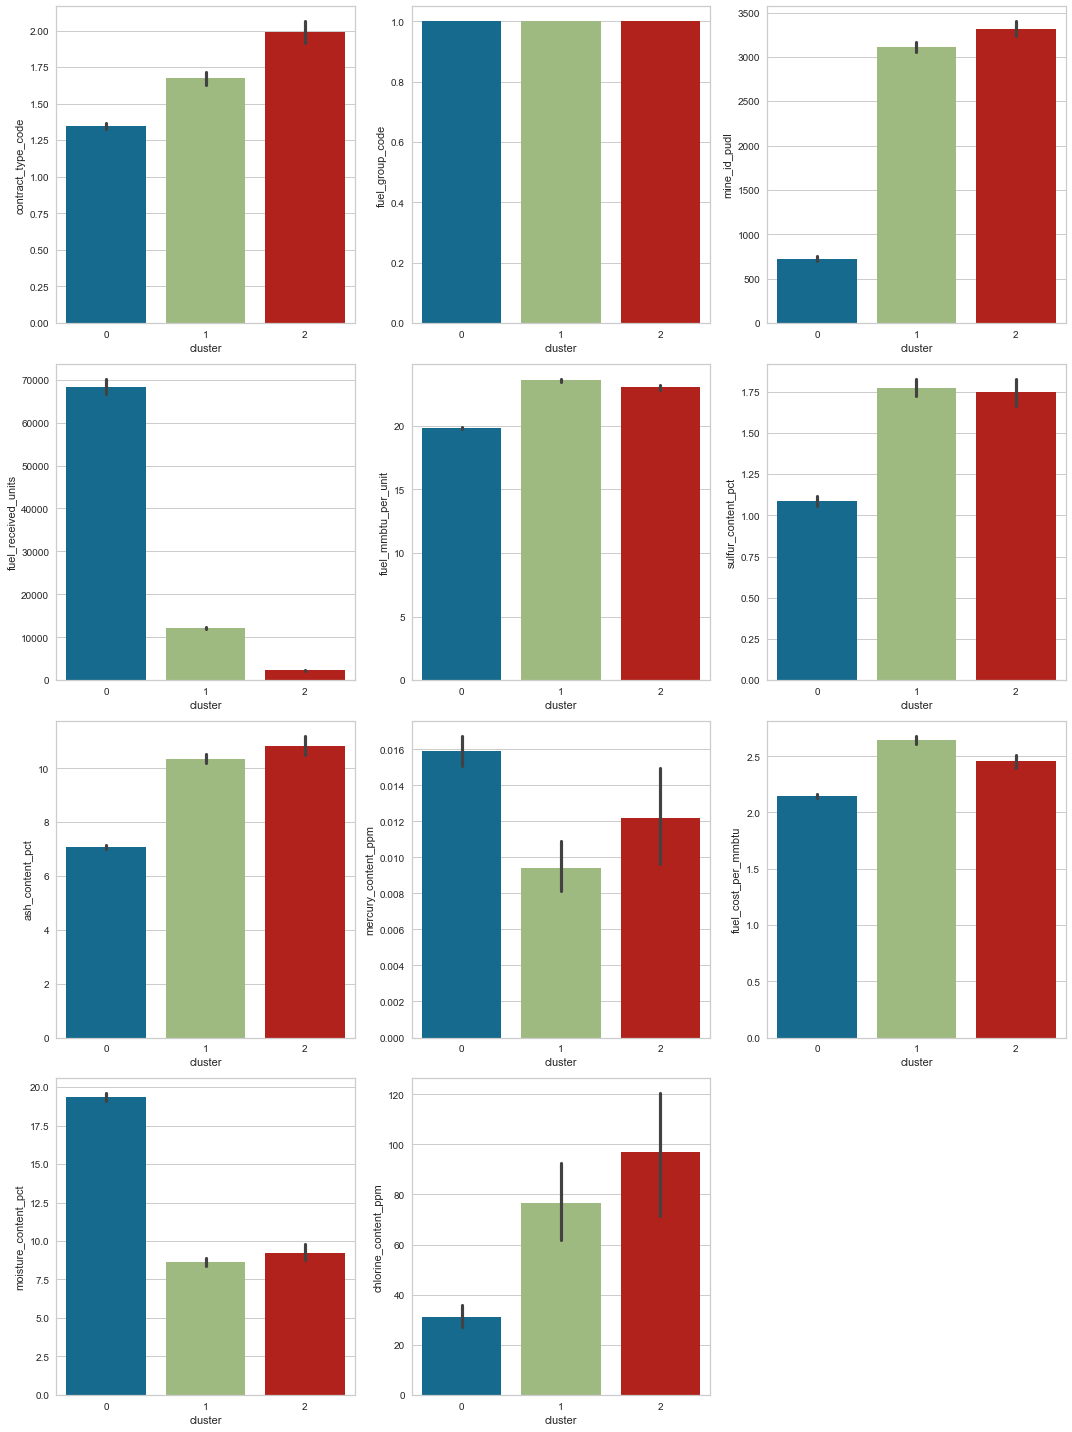

In [390]:
plt.figure(figsize=(15,20))
for i in enumerate(columns):
    plt.subplot(4,3,i[0]+1)
    sns.barplot(x='cluster',y=i[1],data=train)
plt.tight_layout()

### After anyalysing the different clusters cluster0 is performing well with low fuel cost and eco friendly. I would like to suggest other power plants adopt some new measures like purchasing the fuel from one supplier will also help to reduce in fuel cost and i suggest to use efficiency of calorific value to adopt advanced boiler techniques to reduce fuel usage

### Applying Multiple linear Regression on test set to validate the best variable to form clusters

###### Normalising the  test data

In [345]:
dfnormalize= preprocessing.normalize(test)
print(type(test))
print(PDU_set1.columns)
PDU3=pd.DataFrame(dfnormalize, columns=PDU_set1.columns)
PDU3

<class 'pandas.core.frame.DataFrame'>
Index(['contract_type_code', 'fuel_group_code', 'mine_id_pudl',
       'mine_id_pudl_label', 'fuel_received_units', 'fuel_mmbtu_per_unit',
       'sulfur_content_pct', 'ash_content_pct', 'mercury_content_ppm',
       'fuel_cost_per_mmbtu', 'moisture_content_pct', 'chlorine_content_ppm'],
      dtype='object')


,contract_type_code,fuel_group_code,mine_id_pudl,mine_id_pudl_label,fuel_received_units,fuel_mmbtu_per_unit,sulfur_content_pct,ash_content_pct,mercury_content_ppm,fuel_cost_per_mmbtu,moisture_content_pct,chlorine_content_ppm
0,0.000252,0.000084,0.177516,0.177516,0.967972,0.002159,0.000150,0.000656,0.000000e+00,0.000230,0.000648,0.0
1,0.000007,0.000007,0.004872,0.004872,0.999976,0.000131,0.000004,0.000071,0.000000e+00,0.000019,0.000135,0.0
2,0.000033,0.000033,0.000652,0.000652,0.999999,0.000583,0.000010,0.000153,3.257750e-06,0.000059,0.000882,0.0
3,0.000011,0.000011,0.000208,0.000208,1.000000,0.000194,0.000002,0.000047,5.477411e-07,0.000021,0.000299,0.0
4,0.000317,0.000106,0.002328,0.002328,0.999990,0.002488,0.000261,0.000921,0.000000e+00,0.000253,0.001204,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3249,0.000004,0.000004,0.003052,0.003052,0.999991,0.000082,0.000002,0.000042,0.000000e+00,0.000009,0.000083,0.0
3250,0.000025,0.000025,0.003229,0.003229,0.999989,0.000429,0.000007,0.000132,0.000000e+00,0.000067,0.000761,0.0
3251,0.000008,0.000008,0.000150,0.000150,1.000000,0.000139,0.000002,0.000034,0.000000e+00,0.000014,0.000216,0.0
3252,0.000089,0.000089,0.357590,0.357590,0.862701,0.002256,0.000352,0.000813,0.000000e+00,0.000200,0.000551,0.0


### Importing the linear Regression Model and identifying the variables by p value

In [348]:
from sklearn import linear_model
import statsmodels.api as sm
#import statsmodels.formula.api as smf
x=PDU3[['contract_type_code', 'fuel_group_code','mine_id_pudl', 'mine_id_pudl_label', 'fuel_received_units',
       'fuel_mmbtu_per_unit', 'sulfur_content_pct', 'ash_content_pct',
       'mercury_content_ppm', 'moisture_content_pct',
       'chlorine_content_ppm']]
y=PDU3['fuel_cost_per_mmbtu']
regr = linear_model.LinearRegression()
regr.fit(x,y)
mlr = sm.OLS(y,x).fit()
predictions = mlr.predict(x)
mlr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     fuel_cost_per_mmbtu   R-squared (uncentered):                   0.977
Model:                             OLS   Adj. R-squared (uncentered):              0.976
Method:                  Least Squares   F-statistic:                          1.348e+04
Date:                 Mon, 12 Dec 2022   Prob (F-statistic):                        0.00
Time:                         17:54:38   Log-Likelihood:                          23474.
No. Observations:                 3254   AIC:                                 -4.693e+04
Df Residuals:                     3244   BIC:                                 -4.687e+04
Df Model:                           10                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
contract_type_code      -0.1267      0.007    -18.970      0.000      -0.140      -0.114
fuel_group_code          1.1902      0.181      6.571      0.000       0.835       1.545
mine_id_pudl         -6.886e-05   9.34e-06     -7.369      0.000   -8.72e-05   -5.05e-05
mine_id_pudl_label   -6.886e-05   9.34e-06     -7.369      0.000   -8.72e-05   -5.05e-05
fuel_received_units  -6.111e-06   3.51e-06     -1.739      0.082    -1.3e-05     7.8e-07
fuel_mmbtu_per_unit      0.0572      0.008      7.284      0.000       0.042       0.073
sulfur_content_pct       0.3917      0.013     31.201      0.000       0.367       0.416
ash_content_pct         -0.0002      0.005     -0.034      0.973      -0.011       0.010
mercury_content_ppm      3.7125      0.307     12.095      0.000       3.111       4.314
moisture_content_pct    -0.0094      0.002     -4.404      0.000      -0.014      -0.005
chlorine_content_ppm    -0.0007      0.000     -5.503      0.000      -0.001      -0.000
==============================================================================
Omnibus:                     3813.225   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9054663.405
Skew:                           4.974   Prob(JB):                         0.00
Kurtosis:                     261.233   Cond. No.                     3.19e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is  3e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

##### By observing the output of linear regression the major factors effecting the fuel cost per mmbtu are 
'contract_type_code', 'fuel_group_code','mine_id_pudl', 'mine_id_pudl_label', 'fuel_mmbtu_per_unit', 'sulfur_content_pct', 
       'mercury_content_ppm', 'moisture_content_pct','chlorine_content_ppm']

### Removing the variables that have p vlaue greater than 0.005 Applying k means on test data to find clusters

In [396]:
test_data=PDU3[[  'contract_type_code', 'fuel_group_code','mine_id_pudl', 'mine_id_pudl_label', 'fuel_mmbtu_per_unit', 'sulfur_content_pct', 
       'mercury_content_ppm', 'moisture_content_pct','chlorine_content_ppm']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k,init='k-means++', max_iter=1000)
    
    kmeans.fit(PDU3)
    
    sse[k] = kmeans.inertia_ 


In [397]:
sse

{1: 265.6772945715972,
 2: 76.78116100504701,
 3: 31.161954324493045,
 4: 18.995833167099725,
 5: 11.655850034663178,
 6: 9.472435220498381,
 7: 7.377950779722586,
 8: 6.251825506613733,
 9: 5.35138079004707}

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



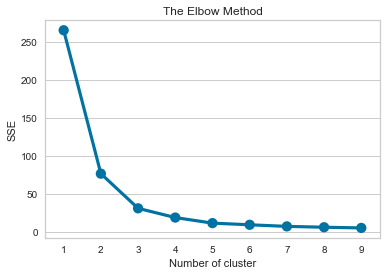

In [398]:
plt.figure()
sns.pointplot(list(sse.keys()), list(sse.values()))
plt.title('The Elbow Method')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [399]:
kmeans = KMeans(n_clusters=2,init='k-means++',max_iter=1000) 
kmeans.fit(test_data)
#print("labels",kmeans.labels_)
cluster_ids=kmeans.predict(test_data)
cluster_ids
test_data["cluster"]=kmeans.fit_predict(test_data)



C:\Users\Hello\AppData\Local\Temp\ipykernel_16116\2343985475.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Validating the factors that good for model

In [400]:
x=PDU3[[  'contract_type_code', 'fuel_group_code','mine_id_pudl', 'mine_id_pudl_label', 'fuel_mmbtu_per_unit', 'sulfur_content_pct', 
       'mercury_content_ppm', 'moisture_content_pct','chlorine_content_ppm']]
y=PDU3['fuel_cost_per_mmbtu']
regr = linear_model.LinearRegression()
regr.fit(x,y)
mlr = sm.OLS(y,x).fit()
predictions = mlr.predict(x)
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     fuel_cost_per_mmbtu   R-squared (uncentered):                   0.976
Model:                             OLS   Adj. R-squared (uncentered):              0.976
Method:                  Least Squares   F-statistic:                          1.685e+04
Date:                 Tue, 13 Dec 2022   Prob (F-statistic):                        0.00
Time:                         00:26:31   Log-Likelihood:                          23473.
No. Observations:                 3254   AIC:                                 -4.693e+04
Df Residuals:                     3246   BIC:                                 -4.688e+04
Df Model:                            8                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
contract_type_code      -0.1260      0.007    -19.008      0.000      -0.139      -0.113
fuel_group_code          1.1770      0.181      6.509      0.000       0.822       1.531
mine_id_pudl         -7.372e-05   8.73e-06     -8.440      0.000   -9.08e-05   -5.66e-05
mine_id_pudl_label   -7.372e-05   8.73e-06     -8.440      0.000   -9.08e-05   -5.66e-05
fuel_mmbtu_per_unit      0.0575      0.008      7.660      0.000       0.043       0.072
sulfur_content_pct       0.3907      0.012     32.452      0.000       0.367       0.414
mercury_content_ppm      3.6908      0.306     12.064      0.000       3.091       4.291
moisture_content_pct    -0.0093      0.002     -4.595      0.000      -0.013      -0.005
chlorine_content_ppm    -0.0007      0.000     -5.576      0.000      -0.001      -0.000
==============================================================================
Omnibus:                     3873.112   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9138048.644
Skew:                           5.138   Prob(JB):                         0.00
Kurtosis:                     262.408   Cond. No.                     8.50e+15
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 3.33e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### From this out put i observed that there is no change in  R square vaule and p values for factors that are good for prediction of the model